# Compuational Physics 2 - Project 1 

## 1. Pseudo random numbers and cryptography

This section deals with pseudo random number generators, testing methods to check these random number generators and using distributions to find correlation. There are also some parts of cryptography included in this project which will be showcased with the assignment.

Four criteria should be  fulfilled by good pseudo random number generators:

1. long period
2. very small correlations among numbers generated in sequence. This fact can be tested with a scatterplot
3. computational speed
4. reproducibility of the random number sequence

### Construct a linear congruential random number generator and use the parameters (a, b, c, x0) = (57, 1, 256, 10) as a pedagogical example. (5 pts)

A linear congruential generator (LCG) is an algorithm that yields a sequence of pseudo-randomized numbers calculated with a discontinuous piecewise linear equation.

The generator is defined by recurrence relation:

$X_{i+1} = (aX_i + b) \: mod \: c$

where a, b and c are integer parameters, termed ”multiplier,” ”increment,” and ”modulus,” respectively, and ”mod” specifies the modulus operator.

The LCG is implemented as follows:

In [1]:
import numpy as np

"""
This is a function which takes in parameters:
    N - number of random numbers needed
    a - multiplier
    b - increment
    c - modulus
    x0 - seed (initial value)
    
and outputs a list:
    out - list of generated random variables
"""

def LCG(N, a, b, c, x0):
    
    # function used for computation
    def f(x):
        return (a*x + b) % c
    
    out = []
    
    for i in range(N):
        x0 = f(x0)
        out += [x0]
        
    return out

# testing our function for LGC (pedagogical example)
# here, N is chosen to be 20 for example
numbers = LCG(20, 57, 1, 256, 10)
print(numbers)

[59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110]


### Determine the period of this random number generator and plot pairs $(x_i, x_{i+1})$ on a 2D scatterplot. Describe the pattern and comment on possible autocorrelations. (5 pts)

The period of this random number generator can be determined to be 256 since this is the value used for c. Since this value is a power of 2, this allows the generator to achieve its full period.

The plotting is as follows:

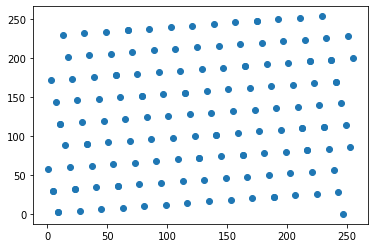

In [2]:
import matplotlib.pyplot as plt

# function to seperate alternate points into seperate lists
def zigzag(seq):
  return seq[::2], seq[1::2]

numbers = LCG(300, 57, 1, 256, 10)
x, y = zigzag(numbers)

plt.scatter(x, y)
plt.show()

The period of 256 is again proven by the scatterplot which extends till the full period only on either axis.

The pattern is not autocorrelated since the points do not follow a specific path. When generated, the position on the plot is random.

### Construct another random number generator, e.g., again using the linear congruent generator above, but with a different set of parameters (or developing another method of your choice). Apply several tests on your random number generator to check for uniformity and correlation. For uniformity, apply a Kolmogorov-Smirnov test to check, whether your random number generator is consistent with a uniform distribution between 0 and 1. Use the autocorrelation function to quantify independence between samples. Examine the distribution function of the resulting correlations: are they consistent with a Gaussian distribution? Further, choose any of the other correlation tests mentioned in the lecture notes, e.g. a gap or poker test. (Hint: For both of these tests, define a window [a, b] with 0 ≤ a < b ≤ 1, and the expected probability to hit this window p = b − a.) Which theoretical distribution would you expect in the case of the gap test, if your samples were truly random? (15 pts)

The LCG was constructed as before with the new parameters (a, b, c, x0) = (43, 3, 511, 19):

In [3]:
new_numbers = LCG(300, 43, 3, 511, 19)
print(new_numbers)

[309, 4, 175, 374, 244, 275, 75, 162, 326, 224, 437, 398, 254, 194, 169, 116, 392, 507, 342, 401, 383, 120, 53, 238, 17, 223, 394, 82, 463, 494, 294, 381, 34, 443, 145, 106, 473, 413, 388, 335, 100, 215, 50, 109, 91, 339, 272, 457, 236, 442, 102, 301, 171, 202, 2, 89, 253, 151, 364, 325, 181, 121, 96, 43, 319, 434, 269, 328, 310, 47, 491, 165, 455, 150, 321, 9, 390, 421, 221, 308, 472, 370, 72, 33, 400, 340, 315, 262, 27, 142, 488, 36, 18, 266, 199, 384, 163, 369, 29, 228, 98, 129, 440, 16, 180, 78, 291, 252, 108, 48, 23, 481, 246, 361, 196, 255, 237, 485, 418, 92, 382, 77, 248, 447, 317, 348, 148, 235, 399, 297, 510, 471, 327, 267, 242, 189, 465, 69, 415, 474, 456, 193, 126, 311, 90, 296, 467, 155, 25, 56, 367, 454, 107, 5, 218, 179, 35, 486, 461, 408, 173, 288, 123, 182, 164, 412, 345, 19, 309, 4, 175, 374, 244, 275, 75, 162, 326, 224, 437, 398, 254, 194, 169, 116, 392, 507, 342, 401, 383, 120, 53, 238, 17, 223, 394, 82, 463, 494, 294, 381, 34, 443, 145, 106, 473, 413, 388, 335, 100,

Kolmogorov–Smirnov test a very efficient way to determine if two samples are significantly different from each other. It is usually used to check the uniformity of random numbers. Uniformity is one of the most important properties of any random number generator. It can also be used to test whether two underlying one-dimensional probability distributions differ.

"The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples."

To use the test for checking the uniformity of random numbers, we use the CDF (cumulative distribution function) of U[0, 1] where F(x)= x for 0<=x<=1. 

######  For our case, we use a null hypothesis which is defined as follows:
###### H0(Null Hypothesis): Null hypothesis assumes that the numbers are uniformly distributed between 0-1. If we are able to reject the Null Hypothesis, this means that the numbers are not uniformly distributed between 0-1. Failure to reject the Null Hypothesis although does not necessarily mean that the numbers follow the uniform distribution.

In our case, we do this using the 'kstest' function in the scipy library.

The outputs are as follows for this function:

statistic: This is the calculated value of D, where D=|F(x)-Sn(x)|. 
-> This D is compared with $D_{alpha}$ where alpha is the level of significance. Alpha is defined as the probability of rejecting the null hypothesis given the null hypothesis(H0) is true. For most of the practical applications, alpha is chosen as 0.05. 

pvalue: This is calculated with the help of D. 
-> If pvalue > alpha, we fail to reject the null hypothesis. Otherwise, we conclude that the numbers are not uniform. Ideally, the pvalue should be as large as possible. For perfect uniform distribution pvalue=1 and statistic=0.

In [4]:
from scipy.stats import kstest

# normalizing our random numbers
xmin = min(new_numbers) 
xmax=max(new_numbers)
for i, x in enumerate(new_numbers):
    new_numbers[i] = (x-xmin) / (xmax-xmin)

#perform Kolmogorov-Smirnov test
kstest(new_numbers, 'uniform')

KstestResult(statistic=0.03456692913385817, pvalue=0.8535201211891246)

Since our pvalue=0.8535 > alpha=0.5, we fail to reject the null hypothesis. However, this does not necessarily mean that the numbers follow the uniform distribution.

### Using your random number generator, construct a one time pad using the English alphabet (26 letters as well as punctuation ”,” , ”.” and space). For this, map each character onto an integer. In Python, you can use ord(x) which maps a given character x on the respective index in the unicode alphabet. E.g. x = ”p” should give you the result ”112”. Next convert each of these integers into an eight-bit binary number, e.g. $112_{10}$ = $01110000_2$. Describe how you constructed the one-time pad (in a short paragraph, using the English characters mentioned above), apply your one time pad to encrypt this paragraph, and attach the encrypted paragraph (a bit string) to your hand in. Provide your random number generator (which needs to generate binary numbers) along with the seed as a piece of code, allowing to reconstruct the key required for encoding. (Note: In principle, this ”key” would of course have to be sent via a different, safe, channel.) (25 pts)

One-time pad (OTP) is a cryptographic technique which cannot be cracked if used properly. OTP combines a plain text sequence b with a random, secret key $τ$ . The plain text and the secret key thereby are bit strings of the same arbitrary but finite length. 

The sequence b is encrypted by the operation 
    $c ≡ b ⊕ τ$ ,
where ⊕ represents the exclusive or operator and c is the encrypted bit string.
Since ⊕ is self-inverse, decryption proceeds analogously through the operation
    $b ≡ c ⊕ τ$ ,
which requires the knowledge of the secret key.

However, OTP is perfectly secure only if the pad is only used once and if generating $τ$ is done by some completely random method, such as a hardware random number generator.
Often, pseudo random number generators are used, which has the advantage of having to only transport the initial state (seed)
and allowing subsequent pads to be generated via the pseudo random number generator. However, the use of pseudo random number generators for cryptography comes at the cost of reduced security.

For our case of an OTP, for encryption, we use the random number generator implemented above (LCG) as our secret key and we use a phrase in the english alphabet as our message. For decryption, we use the same generated key sequence (which can be regenerated using the seed) to decrypt our message.
The implementation is as follows:

In [5]:
# Function to convert a string into a list
def convert(string):
    list1=[]
    list1[:0]=string
    return list1

# Function to convert a message to binary
def toBinary(a):
    l,m=[],[]
    for i in a:
        l.append(ord(i))
    for i in l:
        m.append(bin(i)[2:])
    return m

# Function to call OTP
def otp(message):
    # Generating n random numbers to encrypt the message
    n = len(message)
    key_dec = LCG(n, 43, 3, 255, 19)
    # Converting random numbers to binary
    key_bin = []
    for i in key_dec:
        key_bin.append(bin(i)[2:])
    # Converting message to binary
    mess_bin = toBinary(message)
    
    # Doing the exclusive or operation to encrypt the message 
    # Note that the the final encrypted message k is in binary
    result = [None] * n
    for i in range(n):
        result[i] = int(mess_bin[i],2) ^ int(key_bin[i],2)
    k = []
    for i in result:
        k.append(bin(i)[2:])
    conc = []
    conc = ''.join(map(str, k))
    print(conc)
    
    
x = otp("First, we generated some random numbers using our LCG and converted them to binary. This was our key. Next, we converted our message to binary and did the exclusive or operation on the message and the key. This gave us the binary sequence.")

1110001100000100000101001011101101101101110101011001001010010110100111010110110011111011110111111011100011100101000011101100110110111101101101010101010110100111111011010111111011110011101110001111101101010110100111110011101100111110011111110110100111110010010001011100111001110000101110101110111011100011111101101010100101110011010001011101001111101001010110111101101010101011111110110100111101001110001101110011110111100110010101111110000110000111011001101101111011011011011010010101011111111110101111111011111011111011011110111010011101001001110010100010111000011111001111011010011011010010101000111100000101111111101100111010010111100110101011011111111000011011110001011011110101111110111110101000010011101101001111111101111111011110110110111010111111110101011100001011000100111100100101100111101011100111010101111111011110111100110100111101001001110011010111101011111100000100010010100011010110110011111001100111010100101110011101010110000011110010110111110101110000111110101011100101011001101101

The bit string is as follows:

111000110000010000010100101110110110110111010101100100101001011010011101011011001111101111011111101110001110010100001110110011011011110110110101010101011010011111101101011111101111001110111000111110110101011010011111001110110011111001111111011010011111001001000101110011100111000010111010111011101110001111110110101010010111001101000101110100111110100101011011110110101010101111111011010011110100111000110111001111011110011001010111111000011000011101100110110111101101101101101001010101111111111010111111101111101111101101111011101001110100100111001010001011100001111100111101101001101101001010100011110000010111111110110011101001011110011010101101111111100001101111000101101111010111111011111010100001001110110100111111110111111101111011011011101011111111010101110000101100010011110010010110011110101110011101010111111101111011110011010011110100100111001101011110101111110000010001001010001101011011001111100110011101010010111001110101011000001111001011011111010111000011111010101110010101100110110111100101011001011100001011110111010101100111101111110110011100101011001111000011011001101001101100110100010010000010010010110011111001101010110111000110011101100011100111011110100100111100010011101010001111111001011001110100111110110111000111001100111010100010111011010111100100110111101001011101010101101110101101111011010111101000111100101100101110011001110101000101110110101111000101101111010111111011111010100111101111011101111011101011100101011000111110001001100101011111100111000010111010111001010100010111000110111111110101011100011011110100111110011101001001100000110101011100111101101000110111100110111101110001111010101111111100100

The LCG was used here. Use the same parameters as in the function call in the above block and convert to binary to get the key required for decryption.

Demonstrated below is an OTP which comes built in with python for reference:

In [6]:
import onetimepad

cipher = onetimepad.encrypt('Some example text you want to encode', 'random')
print("Cipher text is ")
print(cipher)
print("Plain text is ")
msg = onetimepad.decrypt(cipher, 'random')
print(msg)

Cipher text is 
210e03014f080a000314030852150b1c1b4d0b0e1b44180c1c154e10004d170f0d0b0b08
Plain text is 
Some example text you want to encode


## 2. Random walks and first passage time

An idealized, one-dimensional random walk is a process, by which a ”walker,” originally located at the
origin (x = 0) moves ”right” and ”left” by (constant) probabilities $p$ and $q = 1 − p$,
respectively, at every discrete step.

Hence, after N steps, the position x(N) of the walker is simply the sum of all individual steps:
$x(N) = \sum_{i=1}^N s_i$
where $s_i$ = +/- l and l is the discrete step size of the random walker.

### Consider a 1d random walk with p = q = 1/2. Use your random number generator (or a built in one) to produce a large number of realizations of random walks, each starting from the origin. For a number of unit steps n compute the histogram of displacements $x_n$ from the origin, that is, the probability density function PDF$(x_n)$. Plot PDF$(x_n)$ for various values of n on a single graph and describe your findings. (20 pts)

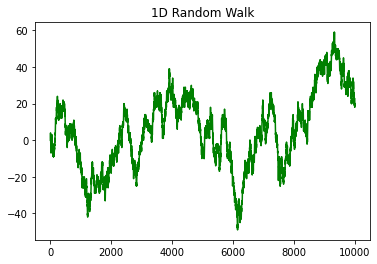

In [7]:
import matplotlib.pyplot as plt
from random import randrange

# Function to return 0 or 1 with equal probability
def random():
    return randrange(2)

#Defining a function for the random walk
#n is the no. of steps that we require
def Randomwalk1D(n):
    x = 0
    y = 0
    # Starting from origin (0,0)
    xpos = [0] 
    ypos = [0]
    # For loop to take the steps
    for i in range (1,n+1):
        """
        The following line of code is a built in random number generator used
        to generate numbers 0 or 1. Depending on these numbers, steps are taken. 
        
        """
        step = random()
        # if step is 0 we move up
        if step == 0:     
            x += 1
            #moving up in y direction
            y += 1
        # if step is 1 we move down
        if step == 1:   
            x += 1
            #moving down in y direction
            y += -1 
 
        xpos.append(x)
        ypos.append(y)
        
    return [xpos,ypos]

# assigning n = 10000
walk = Randomwalk1D(10000) 
plt.plot(walk[0],walk[1],'g') 
plt.title("1D Random Walk")
plt.show()

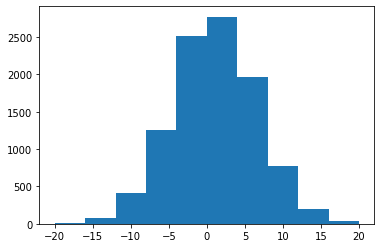

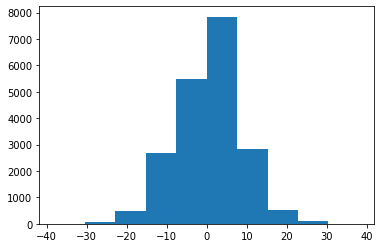

In [8]:
"""
Computing the histogram of displacements for 2 values
of n to show how the histogram changes with the number
of steps taken
"""
a, b = [], []
nn= [30,90]
for n in nn:
    for _ in range(10000):
        k = Randomwalk1D(n)
        b.append(k[1][n])

    plt.hist(b)
    plt.show()

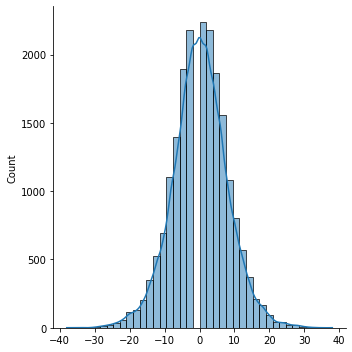

In [92]:
# The pdf can be visualized af follows: 
import seaborn as sns
sns.displot(b, bins=40, kde=True);

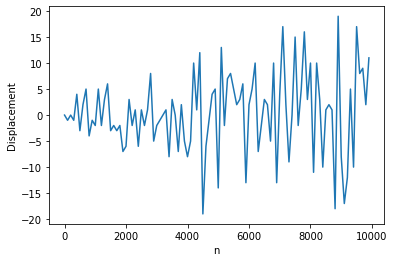

In [10]:
# Now, we plot the displacement against a varying n's
n = np.linspace(1,9900,100,dtype=int)

g = []
mean, var = [],[]
for i in range(len(n)):
    for j in range(i):
        k = Randomwalk1D(i)
    g.append(k[1][i])
    mean.append(np.mean(k[1]))
    var.append(np.var(k[1]))

plt.plot(n,g)
plt.xlabel("n")
plt.ylabel("Displacement")
plt.show()

As shown by the plots above, the histograms follow a Gaussian distribution. With a varying n, the displacement still doesn't seem to exceed more than 20.

### for each n (or a sufficient subset of all n), compute the mean ⟨xn⟩ and variance ⟨x2n⟩ −⟨xn⟩2. Plot both as a function of n and discuss the findings. (10 pts)

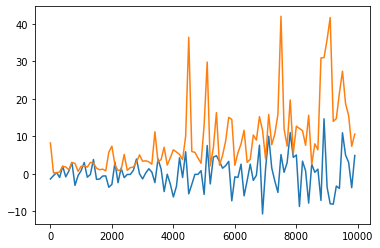

In [11]:
# Using the arrays mean and varience computed above:

plt.plot(n,mean)
plt.plot(n,var)
plt.show()

As seen, the mean is obviously centered around 0, while the variance has some deviation from the y axis. It should be noted that the variance is always positive.

### Modify your algorithm, so that the random walk will start at the origin and terminate when reaching a barrier at $x_0$ = 10. Note that there is no further barrier, e.g., the walker can move freely at any $x < x0$. Store the number of steps n taken to first reach the barrier at $x_0$. Repeat such walks (always starting at the origin) for a large number $w ∼ O(10^3)$ of walkers, yielding a corresponding number $w$ of arrival times n. Plot the histogram of these arrival times on a log-log scale. Repeat the exercise with another value of $x_0$ and discuss your findings. Hint: You will likely need to restrict the total number of steps a walker can take (to some reasonably large number). (20 pts)

Number of steps to first reach the barrier =  16706


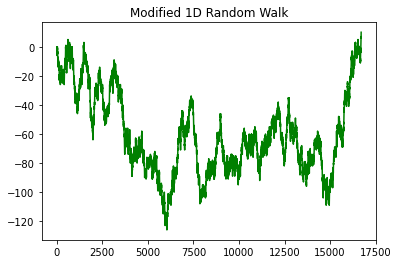

In [61]:
# Modified Random Walk to terminate at some x0
def ModRandomwalk1D(n, x0):
    p = 0
    q = 0
    # Starting from origin (0,0)
    ppos = [0] 
    qpos = [0]
    # For loop to take the steps
    for i in range (1,n+1):
        """
        The following line of code is a built in random number generator used
        to generate numbers 0 or 1. Depending on these numbers, steps are taken. 
        
        """
        step = random()
       
        # if step is 0 we move up
        if step == 0:     
            p += 1
            #moving up in y direction
            if q == 10:
                break
            else:
                q += 1
        # if step is 1 we move down
        if step == 1:   
            p += 1
            #moving down in y direction
            if q == 10:
                break
            else:
                q += -1 

        ppos.append(p)
        qpos.append(q)
        
    return [ppos,qpos]

# assigning n = 100000
walk2 = ModRandomwalk1D(100000, 10) 
print("Number of steps to first reach the barrier = ", walk2[0][-1])
plt.plot(walk2[0],walk2[1],'g') 
plt.title("Modified 1D Random Walk")
plt.show()

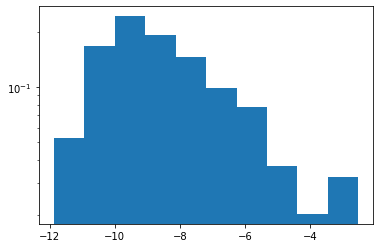

In [77]:
# Using 5000 walkers to check the time for termination
# For accuracy, n is considered at 100000

import timeit

times = []
for i in range(5000):
    t0 = timeit.default_timer()
    walkss = ModRandomwalk1D(100000, 10)
    t1 = timeit.default_timer()
    times.append(t1 - t0)
    
plt.hist(np.log(times), density=True, log=True)
plt.show()

Number of steps to first reach the barrier =  626


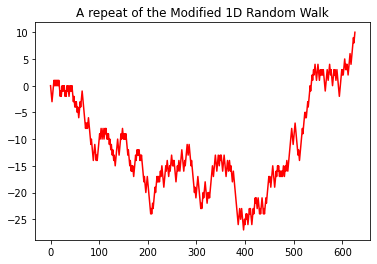

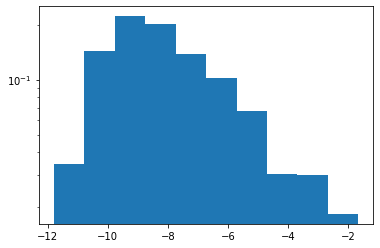

In [88]:
# Repeating the excersice for x0 = 18

"""
First, we use one random walker to check for how the displacement
changes with the steps till x0 = 18
"""

# assigning n = 100000
walk3 = ModRandomwalk1D(100000, 18) 
print("Number of steps to first reach the barrier = ", walk3[0][-1])
plt.plot(walk3[0],walk3[1],'r') 
plt.title("A repeat of the Modified 1D Random Walk")
plt.show()

"""
Next, we use the same conditions as before with multiple random walkers
"""

# Using 5000 walkers to check the time for termination
# For accuracy, n is considered at 100000

times2 = []
for j in range(5000):
    t0 = timeit.default_timer()
    walksss = ModRandomwalk1D(100000, 18)
    t1 = timeit.default_timer()
    times2.append(t1 - t0)
    
plt.hist(np.log(times2), density=True, log=True)
plt.show()

As seen from the plots above, all these findings make sense since the walkers follow a distinct distribution.

References:

https://jacobsuniversity.sharepoint.com/:b:/s/S22_CO-482-B_ComputationalPhysicsII/EdkqihfwZwhIqAZDT5DRkWsBx_Jz62vSISa8_nmDgP9k3Q?e=pO7ruH

https://en.wikipedia.org/wiki/Linear_congruential_generator
